In [1]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf


# Setting up Dataframe

In [2]:
df=pd.read_csv('/content/World_Bank_Projects.csv')

In [3]:
df.head()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,Invigorating local market & competition in Pub...,Malawi - Public Procurement and Disposal of As...,NaN,http://projects.worldbank.org/P175792/null?lan...,2022-03-25T00:00:00Z,...,410000,Republic of Malawi,Investment Project Financing,C,NaN,NaN,NaN,NaN,NaN,NaN
4,P177073,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,To improve the climate resilience of the Recip...,"Department of Transportation, Communications &...",NaN,http://projects.worldbank.org/P177073/null?lan...,2022-03-25T00:00:00Z,...,0,Federated States of Micronesia,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21487 entries, 0 to 21486
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Project ID                         21487 non-null  object 
 1   Region                             21485 non-null  object 
 2   Country                            21485 non-null  object 
 3   Project Status                     21484 non-null  object 
 4   Project Name                       21487 non-null  object 
 5   Project Development Objective      11525 non-null  object 
 6   Implementing Agency                6549 non-null   object 
 7   Consultant Services Required       28 non-null     object 
 8   Project URL                        21487 non-null  object 
 9   Board Approval Date                18617 non-null  object 
 10  Project Closing Date               16458 non-null  object 
 11  Financing Type                     12876 non-null  obj

In [5]:
df.describe()

,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
count,2.134000e+04,2.148700e+04,2.148700e+04,2.148700e+04,2.148700e+04
mean,1.573027e+08,4.537050e+07,2.719748e+07,7.256798e+07,1.924198e+06
std,1.084423e+09,1.227862e+08,6.946621e+07,1.336311e+08,3.925397e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+07,0.000000e+00,0.000000e+00,5.000000e+06,0.000000e+00
50%,3.260000e+07,0.000000e+00,0.000000e+00,2.500000e+07,0.000000e+00
75%,1.013250e+08,3.150000e+07,2.200000e+07,8.400000e+07,0.000000e+00
max,9.300700e+10,3.750000e+09,1.375000e+09,3.750000e+09,5.330000e+09


In [6]:
df.columns

Index(['Project ID', 'Region', 'Country', 'Project Status', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],
      dtype='object')

# Feature Selection

In [ ]:
!pip install autogluon

In [8]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [9]:
train_data = df
test_data=df
subsample_size = 500
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
7165,P111570,Africa,Africa,Closed,COMESA Technical Assistance and Capacity: Afri...,Strengthen the institutional and technical cap...,NaN,NaN,http://projects.worldbank.org/P111570/comesa-t...,2008-06-06T00:00:00Z,...,2250000,NaN,Technical Assistance Loan,U,NaN,"Other Agriculture, Fishing and Forestry","Agricultural markets, commercialization and ag...",NaN,Other economic management,Rural policies and institutions
1195,P169143,Europe and Central Asia,Republic of Turkey,Active,Renewable Energy Integration Project Additiona...,The PDO is “To assist Turkey in meeting its in...,TEIAS- Turkish Electricity Transmission Company,NaN,http://projects.worldbank.org/P169143/null?lan...,2020-02-28T00:00:00Z,...,0,TEIAS- Turkish Electricity Transmission Company,Investment Project Financing,NaN,NaN,Renewable Energy Wind,ICT Infrastructure,Energy Transmission and Distribution,NaN,NaN
13307,P005822,Middle East and North Africa,Republic of Yemen,Closed,Health Sector Development Project,NaN,NaN,NaN,http://projects.worldbank.org/P005822/health-s...,1990-05-31T00:00:00Z,...,0,NaN,Specific Investment Loan,C,NaN,Health,NaN,NaN,Child health,Health system performance
11217,P056333,Latin America and Caribbean,Republic of Honduras,Closed,PUB.SCT.MDRN/IDA REF,NaN,NaN,NaN,http://projects.worldbank.org/P056333/pubsctmd...,1997-12-15T00:00:00Z,...,0,NaN,Structural Adjustment Loan,U,NaN,Central Government (Central Agencies),ICT Infrastructure,Aviation,"Public expenditure, financial management and p...",Administrative and civil service reform
4148,P126470,Africa West,Republic of Senegal,Closed,SN- Second Governance and Growth Support Credit,The proposed operation supports the Recipient&...,Ministry of Economy and Finance,NaN,http://projects.worldbank.org/P126470/null?lan...,2013-12-19T00:00:00Z,...,0,NaN,Development Policy Lending,NaN,NaN,Central Government (Central Agencies),Other Energy and Extractives,Health,Administrative and civil service reform,"Public expenditure, financial management and p..."


In [10]:
label = 'Grant Amount'
print("Summary of Grant Amount variable: \n", train_data[label].describe())

Summary of Grant Amount variable: 
 count    5.000000e+02
mean     1.371300e+06
std      6.737469e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.250000e+07
Name: Grant Amount, dtype: float64


In [ ]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path).fit(train_data)

**AutoGluon correctly recognized our prediction problem to be a binary classification task**

In [12]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  regression
AutoGluon identified the following types of features:
('category', [])                    :   5 | ['Region', 'Project Status', 'Financing Type', 'Environmental Assessment Category', 'Sector 1']
('category', ['text_as_category'])  :  10 | ['Country', 'Project Name', 'Project Development Objective ', 'Implementing Agency', 'Borrower', ...]
('float', [])                       :   1 | ['Current Project Cost']
('int', [])                         :   3 | ['IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment']
('int', ['binned', 'text_special']) :  94 | ['Country.char_count', 'Country.word_count', 'Country.capital_ratio', 'Country.lower_ratio', 'Country.special_ratio', ...]
('int', ['bool'])                   :   1 | ['Environmental and Social Risk']
('int', ['datetime_as_int'])        :  10 | ['Board Approval Date', 'Board Approval Date.year', 'Board Approval Date.month', 'Board Approval Date.day', 'Board Approval Date.dayofweek',

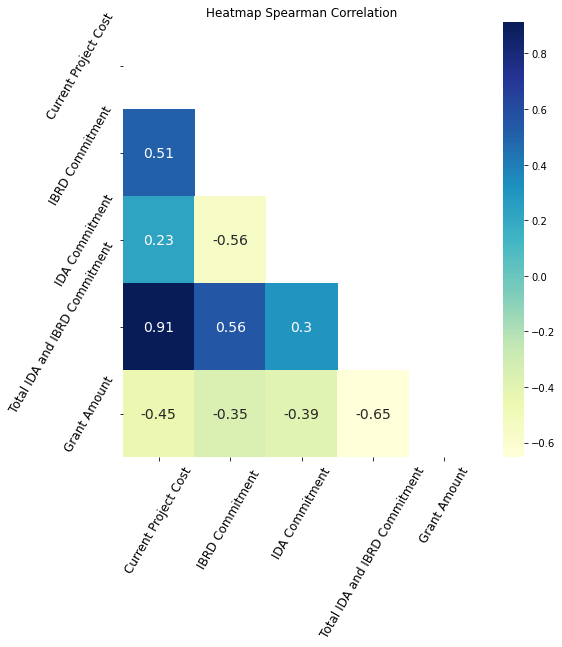

In [13]:
#HeatMap Spearman Correlation
plt.figure(figsize=(8,8))
matrix = np.triu(df.corr(method='spearman'))
heat_map = sns.heatmap(df.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')

In [92]:
#Feature Selection
after_fs = df[['Project ID','Project Status','Board Approval Date',
       'Project Closing Date','Current Project Cost',
       'Grant Amount','Total IDA and IBRD Commitment']]
after_fs.head(20)

,Project ID,Project Status,Board Approval Date,Project Closing Date,Current Project Cost,Grant Amount,Total IDA and IBRD Commitment
0,P169983,Active,2022-03-25T00:00:00Z,NaN,5.000000e+08,0,500000000
1,P173711,Active,2022-03-25T00:00:00Z,NaN,4.000000e+08,0,400000000
2,P175747,Active,2022-03-25T00:00:00Z,NaN,1.822500e+08,0,180000000
3,P175792,Active,2022-03-25T00:00:00Z,NaN,4.100000e+05,410000,0
4,P177073,Active,2022-03-25T00:00:00Z,NaN,3.525000e+07,0,35250000
5,P177299,Active,2022-03-25T00:00:00Z,NaN,2.000000e+07,20000000,0
6,P178043,Active,2022-03-25T00:00:00Z,NaN,6.000000e+07,0,60000000
7,P174495,Active,2022-03-24T00:00:00Z,NaN,3.950000e+08,0,295000000
8,P176006,Active,2022-03-24T00:00:00Z,NaN,2.940000e+08,0,80000000
9,P176788,Active,2022-03-24T00:00:00Z,NaN,7.500000e+08,0,750000000


In [ ]:
!pip install spacytextblob

In [16]:
import spacy
from collections import Counter
from string import punctuation
import en_core_web_sm
from spacytextblob.spacytextblob import SpacyTextBlob

/usr/local/lib/python3.7/dist-packages/spacy/util.py:845: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.3.1,<3.4.0
  warnings.warn(warn_msg)


In [17]:
nlp=spacy.load("en_core_web_sm")

OSError: ignored

In [ ]:
def get_hotwords(text):
    result = []
    pos_tag = ['Project ID','Project Status','Board Approval Date',
       'Project Closing Date','Current Project Cost',
       'Grant Amount','Total IDA and IBRD Commitment'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [ ]:
output = get_hotwords(''''Project ID', 'Region', 'Country', 'Project Status', 'Project Name',
        'Project Development Objective ', 'Implementing Agency',
        'Consultant Services Required', 'Project URL', 'Board Approval Date',
        'Project Closing Date', 'Financing Type', 'Current Project Cost',
        'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
        'Grant Amount', 'Borrower', 'Lending Instrument',
        'Environmental Assessment Category', 'Environmental and Social Risk',
        'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2''')
print(output)

# Entity Extraction

In [ ]:
!pip install simpletransformers

import joblib
import torch
import torch.nn as nn
import transformers
from tqdm import tqdm
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn import preprocessing
from sklearn import model_selection


In [ ]:
!python -m spacy download en_core_web_sm

In [20]:
#imports the model as a module
import en_core_web_sm
#loads the model as snlp
snlp = spacy.load("en_core_web_sm")

In [21]:
sourcefiledirectory = '/content'
#changes the working directory to the directory specified above
os.chdir(sourcefiledirectory)
infilename = 'World_Bank_Projects.csv'

# Create NER csv file with new columns 
**there are two columns in the source file that contain text where we want to find entities: text and comments.**

--> we can add all the required columns for the further evaluation of NER

-->NER csv columns are used for the keyword extraction from the dataframe

In [32]:
#creates pandas dataframe with your specified input file, using the first row as a header
df = pd.read_csv(infilename, header=0)
#creates a new column, ner_text, with entities extracted from a column titled 'text'
df['ner_PID'] = df['Project ID'].astype(str).apply(lambda x: list(snlp(x).ents))
#prints the values from ner_PID
print(df['ner_PID'])
#creates a new column, ner_TOT_IDA_IBRD
df['ner_TOT_IDA_IBRD'] = df['Total IDA and IBRD Commitment'].astype(str).apply(lambda x: list(snlp(x).ents))
#prints the values from ner_TOT_IDA_IBRD
print(df['ner_TOT_IDA_IBRD'])
#creates a new column, ner_Agency, with entities extracted from a column titled 'text'
df['ner_Agency'] = df['Implementing Agency'].astype(str).apply(lambda x: list(snlp(x).ents))
#prints the values from ner_Agency
print(df['ner_Agency'])
#creates a new column, ner_comments, with entities extracted from a column titled 'comments'
df['ner_Cost'] = df['Current Project Cost'].astype(str).apply(lambda x: list(snlp(x).ents))
#prints the values from ner_comments
print(df['ner_Cost'])

0                 []
1                 []
2        [(P175747)]
3                 []
4        [(P177073)]
            ...     
21482             []
21483             []
21484             []
21485             []
21486             []
Name: ner_PID, Length: 21487, dtype: object
0        [(500000000)]
1        [(400000000)]
2        [(180000000)]
3                [(0)]
4         [(35250000)]
             ...      
21482     [(13500000)]
21483     [(12000000)]
21484     [(40000000)]
21485    [(195000000)]
21486    [(250000000)]
Name: ner_TOT_IDA_IBRD, Length: 21487, dtype: object
0                          [(Ministry, of, Finance), (the, Republic, of, Angola)]
1                                                                              []
2                   [(Ministry, of, Agriculture, -, Directorate, of, Irrigation)]
3        [(Malawi, -, Public, Procurement, and, Disposal, of, Assets, Authority)]
4        [(Department, of, Transportation, ,, Communications, &, Infrastructure)]
         

In [33]:
outfilename = 'ner_'+infilename
df.to_csv(outfilename)

In [34]:
outfilename

'ner_World_Bank_Projects.csv'

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
data=pd.read_csv('/content/ner_World_Bank_Projects.csv',encoding='latin1')

In [37]:
data['ner_PID']=LabelEncoder().fit_transform(data['ner_PID'])

In [38]:
data.columns

Index(['Unnamed: 0', 'Project ID', 'Region', 'Country', 'Project Status',
       'Project Name', 'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2', 'ner_PID',
       'ner_TOT_IDA_IBRD', 'ner_Agency', 'ner_Cost'],
      dtype='object')

In [40]:
data.drop([ 'Project ID', 'Region', 'Country', 'Project Status',
       'Project Name', 'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],axis=1,inplace=True)

In [41]:
data.columns

Index(['Unnamed: 0', 'ner_PID', 'ner_TOT_IDA_IBRD', 'ner_Agency', 'ner_Cost'], dtype='object')

In [42]:
data.head()

,Unnamed: 0,ner_PID,ner_TOT_IDA_IBRD,ner_Agency,ner_Cost
0,0,4223,[500000000],"[Ministry of Finance, the Republic of Angola]",[500000000.0]
1,1,4223,[400000000],[],[400000000.0]
2,2,4079,[180000000],[Ministry of Agriculture - Directorate of Irrigation],[182250000.0]
3,3,4223,[0],[Malawi - Public Procurement and Disposal of Assets Authority],[410000.0]
4,4,4141,[35250000],"[Department of Transportation, Communications & Infrastructure]",[35250000.0]


In [46]:
data.head(3)

,Unnamed: 0,ner_PID,ner_TOT_IDA_IBRD,ner_Agency,ner_Cost
0,0,4223,[500000000],"[Ministry of Finance, the Republic of Angola]",[500000000.0]
1,1,4223,[400000000],[],[400000000.0]
2,2,4079,[180000000],[Ministry of Agriculture - Directorate of Irrigation],[182250000.0]


In [47]:
data.rename(columns={'ner_PID':'pid','ner_TOT_IDA_IBRD':'tot_ida','ner_Agency':'label','ner_Cost':'cost'},inplace=True)

In [73]:
data['labels']=data['labels'].str.upper()

In [74]:
x=data[['pid','agency']]
y=data['labels']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
train_data=pd.DataFrame({'pid':x_train['pid'],'agency':x_train['agency'],'lables':y_train})
test_data=pd.DataFrame({'pid':x_train['pid'],'agency':x_train['agency'],'lables':y_train})

In [77]:
train_data

,pid,agency,lables
15307,4223,[],NaN
8750,4223,[],NaN
7319,4223,[KADUNA STATE MINISTRY OF WORKS AND TRANSPORT],NaN
10446,4223,[],NaN
21170,4223,[],NaN
...,...,...,...
18891,4223,[],NaN
20848,494,[],NaN
5025,4223,[],NaN
4922,4223,[Sui Southern Gas Company Limited],NaN


# Model Training

In [78]:
from simpletransformers.ner import NERModel,NERArgs

In [88]:
label = data["labels"].unique().tolist()
label

[nan]

In [81]:
args = NERArgs()
args.num_train_epochs = 1
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 32
args.eval_batch_size = 32

In [90]:
model = NERModel('bert', 'bert-base-cased',labels=label,args =args,)

AssertionError: ignored

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
model.train_model(train_data,eval_data = test_data,acc=accuracy_score)

KeyError: ignored

In [ ]:
prediction, model_output = model.predict(["What is the new name of agency xyz"])

In [ ]:
prediction